In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pickle
import random

In [ ]:
music = pd.read_csv("/content/SpotifyFeatures.csv")

In [ ]:
music.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814


In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
music.duplicated().sum()

0

In [ ]:
#music = music[['track_name','danceability','energy','popularity','acousticness','duration_ms','instrumentalness','liveness','loudness','speechiness','tempo','valence']]

In [ ]:
features = music.drop(['track_id', 'time_signature','track_name', 'artist_name', 'key'], axis = 1)
for feature in features:
    music[feature] = music[feature].fillna('')
  

In [ ]:
features.head(1)

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,0,0.611,0.389,99373,0.91,0.0,0.346,-1.828,Major,0.0525,166.969,0.814


In [ ]:
order = music[['track_name', 'artist_name']]
order

,track_name,artist_name
0,C'est beau de faire un Show,Henri Salvador
1,Perdu d'avance (par Gad Elmaleh),Martin & les fées
2,Don't Let Me Be Lonely Tonight,Joseph Williams
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador
4,Ouverture,Fabien Nataf
...,...,...
232720,Son Of Slide,Slave
232721,Burning Fire,Jr Thomas & The Volcanos
232722,(I'm Your) Hoochie Coochie Man,Muddy Waters
232723,With My Words,R.LUM.R


In [ ]:
OE = OrdinalEncoder()
mode_cols = ['mode']
features[mode_cols] = OE.fit_transform(features[mode_cols])

features = pd.get_dummies(features)
features.insert(loc=0, column='track_name', value=order.track_name)
features.insert(loc=1, column = 'artist_name', value = order.artist_name)

In [ ]:
features

,track_name,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,C'est beau de faire un Show,Henri Salvador,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0,0.0525,166.969,0.814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Perdu d'avance (par Gad Elmaleh),Martin & les fées,1,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,1.0,0.0868,174.003,0.816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Don't Let Me Be Lonely Tonight,Joseph Williams,3,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,1.0,0.0362,99.488,0.368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0,0.0395,171.758,0.227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Ouverture,Fabien Nataf,4,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0,0.0456,140.576,0.390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Son Of Slide,Slave,39,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0,0.0316,115.542,0.962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
232721,Burning Fire,Jr Thomas & The Volcanos,38,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,1.0,0.0337,113.830,0.969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
232722,(I'm Your) Hoochie Coochie Man,Muddy Waters,47,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.0,0.1480,84.135,0.813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
232723,With My Words,R.LUM.R,44,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,0.0,0.1460,100.031,0.489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
genres_names = ['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       "genre_Children's Music", "genre_Children’s Music", 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World']

In [ ]:
genres = features.groupby(['track_name', 'artist_name'])[genres_names].sum()
genres

,,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
track_name,artist_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
""" La Traviata "" : Amami Alfredo (Act II) - Digitally Remastered",Maria Callas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
"""1点""",Yuki Hayashi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""42"" - From SR3MM",Rae Sremmurd,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"""45""",The Gaslight Anthem,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
"""6人で(強い方が強い)""",Yuki Hayashi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
하드캐리 Hard Carry,GOT7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
해줄 수 없는 일 Haejul Su Eomneun Il,Park Hyo Shin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
행복했던 날들이었다 days gone by,Day6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
column_names = ['track_name', 'artist_name']
for i in genres_names:
    column_names.append(i)

genres.reset_index(inplace=True)
genres.columns = column_names
genres

,track_name,artist_name,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",Maria Callas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,"""1点""",Yuki Hayashi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"""42"" - From SR3MM",Rae Sremmurd,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,"""45""",The Gaslight Anthem,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"""6人で(強い方が強い)""",Yuki Hayashi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176509,하드캐리 Hard Carry,GOT7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
176510,해줄 수 없는 일 Haejul Su Eomneun Il,Park Hyo Shin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
176511,행복했던 날들이었다 days gone by,Day6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
176512,휘파람,Lee Moon Sae,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
features = features.drop(genres_names, axis = 1)
features

,track_name,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,C'est beau de faire un Show,Henri Salvador,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0,0.0525,166.969,0.814
1,Perdu d'avance (par Gad Elmaleh),Martin & les fées,1,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,1.0,0.0868,174.003,0.816
2,Don't Let Me Be Lonely Tonight,Joseph Williams,3,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,1.0,0.0362,99.488,0.368
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0,0.0395,171.758,0.227
4,Ouverture,Fabien Nataf,4,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Son Of Slide,Slave,39,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0,0.0316,115.542,0.962
232721,Burning Fire,Jr Thomas & The Volcanos,38,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,1.0,0.0337,113.830,0.969
232722,(I'm Your) Hoochie Coochie Man,Muddy Waters,47,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.0,0.1480,84.135,0.813
232723,With My Words,R.LUM.R,44,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,0.0,0.1460,100.031,0.489


In [ ]:
fea_cols = features.drop(['track_name', 'artist_name'], axis = 1).columns
scaler = StandardScaler()
features[fea_cols] = scaler.fit_transform(features[fea_cols])

songs = pd.merge(genres, features, how = 'inner', on = ['track_name', "artist_name"])
songs = songs.drop_duplicates(['track_name', 'artist_name']).reset_index(drop = True)


In [ ]:
songs.head()

,track_name,artist_name,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",Maria Callas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.556765,1.760139,-1.025627,-0.867606,-1.123371,-0.396017,0.393352,-0.377133,-0.730526,-0.419178,-1.021740,-1.597743
1,"""1点""",Yuki Hayashi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.996569,-0.968411,-1.639826,-0.648438,0.725142,1.214458,-0.610319,-0.537515,1.368876,-0.398695,-0.924746,-1.428170
2,"""42"" - From SR3MM",Rae Sremmurd,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.652697,-1.031128,2.228546,0.024363,-0.030205,-0.489819,-0.539709,0.471123,-0.730526,0.022828,0.400417,-0.503401
3,"""45""",The Gaslight Anthem,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.377819,-1.036918,-1.289625,-0.274344,1.514651,-0.489819,0.312655,0.810392,-0.730526,-0.101149,1.954812,-0.122726
4,"""6人で(強い方が強い)""",Yuki Hayashi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.326422,1.698126,-2.038516,-0.539135,-1.692728,2.495969,-0.433794,-1.188544,-0.730526,-0.462839,0.595796,-1.571980


In [ ]:
songs.shape

(176514, 41)

In [ ]:
# random500
songs = songs.sample(n=5000,axis=0,random_state=42)
songs.head()
songs.shape





(5000, 41)

In [ ]:
DF = pd.DataFrame(songs.drop(['track_name', 'artist_name'], axis = 1))
kmeans = KMeans(n_clusters=17)
songs['Cluster'] = kmeans.fit_predict(DF)
songs.shape

(5000, 42)

In [ ]:
songs.head(20)

,track_name,artist_name,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,Cluster
159658,VANQUISH,南那城メィジ(CV.木村昴),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.546325,-1.018725,0.590684,-1.195851,1.309682,-0.489819,-0.742461,0.896585,1.368876,-0.031075,0.560779,1.353828,16
92361,Mañana,Jimmy Buffett,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.007010,0.144995,0.779253,0.173435,-0.356637,-0.483345,-0.598719,-0.690894,-0.730526,-0.474698,0.118044,1.888310,5
66879,I Paggliacci: Vesti la giubba,Ruggero Leoncavallo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1.821202,1.596651,-1.397379,-0.237232,-1.351114,-0.489819,-0.504404,-0.584029,-0.730526,-0.457449,0.739232,-1.423556,8
138934,Sunset,Aun J-Classic Orchestra,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.381398,1.531820,-2.243248,0.795814,-1.571265,1.970814,-0.787348,-0.563022,-0.730526,-0.456910,-1.740376,-0.903301,2
89518,Macusa,Buena Vista Social Club,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.322844,1.089276,0.445216,0.079393,0.231699,-0.489819,0.383265,-0.092547,1.368876,-0.446130,-0.435343,1.449958,12
161796,Wack,Barely Alive,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.007010,-1.033242,0.849294,-0.313239,1.324865,-0.480075,-0.247182,1.691491,-0.730526,0.157586,1.043612,0.100295,9
61688,Hillbilly,Upchurch,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.147477,-0.855379,1.253371,-0.708495,0.687185,-0.489819,-0.539709,0.713029,-0.730526,-0.084978,0.724086,-0.984050,0
143811,"That's How You Know - From ""Enchanted""",Amy Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.546325,0.269020,-0.341389,-0.055739,0.463238,-0.489819,0.943101,0.701192,-0.730526,0.718179,1.825163,0.319471,9
111225,Perfecta,Star Cast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.007010,-0.896533,0.612235,-0.663235,0.349366,-0.489797,-0.529622,0.616000,-0.730526,0.561859,2.146405,0.334852,9
86194,Lone Ranger,Matt Duncan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.281887,0.421233,0.833130,-0.426250,-0.538831,-0.445560,-0.603258,-0.075709,1.368876,-0.508657,-0.766844,0.584789,12


In [ ]:
songs.to_csv('songs.csv',index = False)

In [ ]:
def find_song_database(name, artist, songs):
    result = songs[(songs.artist_name == str(artist)) & (songs.track_name == str(name))]
    if len(result) == 0:
        return None
    return result.drop(['track_name', 'artist_name', 'Cluster'], axis = 1)

def find_similar(name, artist, songs):
    database = songs[songs.popularity > 0.5].reset_index(drop = True)
    indx_names = database[['track_name', 'artist_name', 'tempo','popularity','energy','danceability','valence','liveness','loudness','speechiness','Cluster']]
    songs_train = database.drop(['track_name', 'artist_name', 'tempo','popularity','energy','danceability','valence','liveness','loudness','speechiness','Cluster'], axis = 1)

    song = find_song_database(str(name), str(artist), database)
    
    if type(song) != type(None):
        indx_song = song.index

        cos_dists = cosine_similarity(songs_train, songs_train)
        indx_names.loc[:,['result']] = cos_dists[indx_song[0]]

        indx_names = indx_names.sort_values(by = ['result'], ascending = False)

        #tempo= indx_names[1:6]['tempo'].reset_index(drop = True)

        return indx_names[1:6].reset_index(drop = True)
    
    else:
        print("Song not found")
        return None
    
    
def playlist_song(name, artist, songs):
    list_songs = find_similar(str(name), str(artist), songs)
    
    if type(list_songs) != type(None):
    
        print('Playlist based on "' + str(name) + '" by ' + str(artist))
        print()

        for i in np.arange(0,len(list_songs)):
            track_name = list_songs.track_name[i]
            artist_name = list_songs.artist_name[i]

            print(str(track_name) + ' - ' + str(artist_name))
            
    return None

In [ ]:
playlist_song('17','Kings of Leon',songs)

Playlist based on "17" by Kings of Leon

Sleepwalking - The Chain Gang Of 1974
Catastrophize - Noah Kahan
On Your Way Down - The Jungle Giants
Adore - Amy Shark
Passerby - Ripe


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1= find_similar('Hillbilly','Upchurch',songs)
df1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,artist_name,tempo,popularity,energy,danceability,valence,liveness,loudness,speechiness,Cluster,result
0,Burnin,Upchurch,1.500102,0.542746,1.226177,-0.147432,0.554028,0.922927,0.662681,0.335466,9,0.998502
1,Country Boy Shit,Upchurch,0.722791,0.762648,1.328661,1.657449,0.331006,0.479093,0.939097,-0.363119,0,0.956797
2,Love Scars 3,Trippie Redd,-1.154884,1.972110,-0.178238,-0.055841,-1.299356,-0.549796,0.276064,-0.316223,0,0.855836
3,Coldest Winter,Kanye West,0.527088,0.872599,-0.242765,-0.077392,0.069533,0.201696,-0.124223,-0.327004,0,0.854076
4,How Forever Feels,Kenny Chesney,0.234100,0.707672,0.391119,0.908558,0.596325,0.322742,0.357255,-0.490869,0,0.852899


In [ ]:
df1=df1.drop(['result','track_name','artist_name','Cluster'],axis = 1)
df1

,tempo,popularity,energy,danceability,valence,liveness,loudness,speechiness
0,1.500102,0.542746,1.226177,-0.147432,0.554028,0.922927,0.662681,0.335466
1,0.722791,0.762648,1.328661,1.657449,0.331006,0.479093,0.939097,-0.363119
2,-1.154884,1.972110,-0.178238,-0.055841,-1.299356,-0.549796,0.276064,-0.316223
3,0.527088,0.872599,-0.242765,-0.077392,0.069533,0.201696,-0.124223,-0.327004
4,0.234100,0.707672,0.391119,0.908558,0.596325,0.322742,0.357255,-0.490869


In [ ]:
df1

,tempo,popularity,energy,danceability,valence,liveness,loudness,speechiness
0,1.500102,0.542746,1.226177,-0.147432,0.554028,0.922927,0.662681,0.335466
1,0.722791,0.762648,1.328661,1.657449,0.331006,0.479093,0.939097,-0.363119
2,-1.154884,1.972110,-0.178238,-0.055841,-1.299356,-0.549796,0.276064,-0.316223
3,0.527088,0.872599,-0.242765,-0.077392,0.069533,0.201696,-0.124223,-0.327004
4,0.234100,0.707672,0.391119,0.908558,0.596325,0.322742,0.357255,-0.490869


In [ ]:
df2= songs[(songs['artist_name']=='Upchurch') & (songs['track_name']=='Hillbilly')]
df2

,track_name,artist_name,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,Cluster
61688,Hillbilly,Upchurch,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.147477,-0.855379,1.253371,-0.708495,0.687185,-0.489819,-0.539709,0.713029,-0.730526,-0.084978,0.724086,-0.98405,0


In [ ]:
df2= df2[['tempo','popularity','energy','danceability','valence','liveness','loudness','speechiness']]
df2

,tempo,popularity,energy,danceability,valence,liveness,loudness,speechiness
61688,0.724086,1.147477,0.687185,1.253371,-0.98405,-0.539709,0.713029,-0.084978


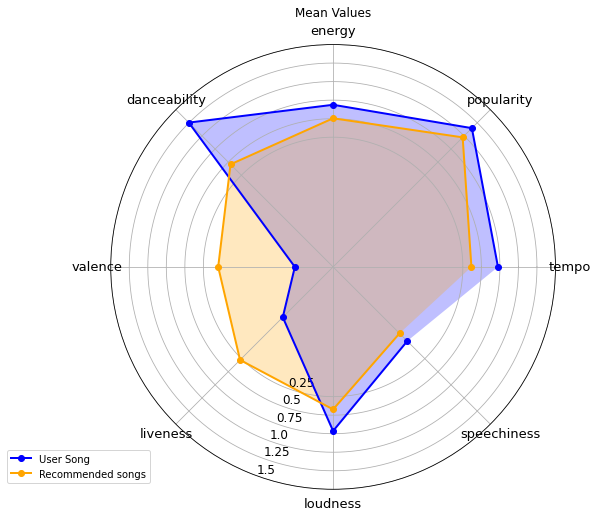

In [ ]:
labels = list(df2)[:]
features = df2.mean().tolist()
features_all = df1.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features, 'o-', linewidth=2, label = "User Song", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.25 , 0.5 , 0.75 , 1.0, 1.25,  1.5, 1.75,2.0], ["0.25",'0.5', "0.75", "1.0", "1.25", "1.5", '1.75','2.0'], size=12)
plt.ylim(-1.5,1.5)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "Recommended songs", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [ ]:
pickle.dump(songs.to_dict(),open('music_dict.pkl','wb'))

In [ ]:
database = songs[songs.popularity > 0.5].reset_index(drop = True)
indx_names = database[['track_name', 'artist_name', 'Cluster']]
songs_train = database.drop(['track_name', 'artist_name', 'Cluster'], axis = 1)